In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot as plt
from celluloid import Camera
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc
from functools import reduce

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src import crs
from IPython.display import clear_output, Markdown, display

In [23]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

In [24]:
# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)
m.head()

/Users/formegusto/Desktop/idoformegusto/development/research/what-is-public-fee/src/crs/utils/data_preprocessing.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datas_df[household_name] = household_df[col][3:].to_list()
/Users/formegusto/Desktop/idoformegusto/development/research/what-is-public-fee/src/crs/utils/data_preprocessing.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  month_usage_df[name] = [


,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,아파트1-101-1602,...,아파트1-104-303,아파트1-104-404,아파트1-104-408,아파트1-104-503,아파트1-104-507,아파트1-104-606,아파트1-104-705,아파트1-104-708,아파트1-104-902,아파트1-104-905
month,,,,,,,,,,,,,,,,,,,,,
1,253,689,183,239,455,343,380,219,389,350,...,10,111,39,151,181,180,290,184,176,148
2,251,481,177,218,397,297,339,197,348,288,...,77,107,30,114,151,151,263,177,158,127
3,255,424,203,222,378,303,349,202,357,368,...,77,120,28,116,163,157,281,182,171,127
4,252,355,180,230,368,278,298,188,346,365,...,76,64,58,109,151,148,257,175,140,121
5,230,357,258,203,414,270,418,156,320,265,...,150,63,75,137,115,13,84,149,36,117


In [57]:
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

households_kWh = month_df['usage (kWh)'].sum()
PUBLIC_PERCENTAGE = 0
APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))

hh, anal = crs.utils.get_analysis_df(_month,month_df, APT)
pd.DataFrame(anal[['전력량요금']][:3])

,전력량요금
APT,2935656
세대부,3118820
공용부,-183164


In [48]:
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

households_kWh = month_df['usage (kWh)'].sum()
PUBLIC_PERCENTAGE = 0
APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))

hh, anal = crs.utils.get_analysis_df(_month,month_df, APT)
pd.DataFrame(anal[['전력량요금']][:3])

,전력량요금
APT,2935656
세대부,3118820
공용부,-183164


In [114]:
rounds = list()
names = list()
results = list()

_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

households_kWh = month_df['usage (kWh)'].sum()

for Round, PUBLIC_PERCENTAGE in enumerate(range(10, 70)):
    APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))

    hh, anal = crs.utils.get_analysis_df(_month,month_df, APT)
    
    for _ in range(0,3):
        rounds.append(Round + 1)
        
    names.append("공용부")
    names.append("세대부")
    names.append("공용부 연료비조정액")
    
    results.append(PUBLIC_PERCENTAGE)
    results.append(100 - PUBLIC_PERCENTAGE)
    results.append(anal.loc['공용부 / APT percentage']['연료비 조정액'])

data = list()
data.append(rounds)
data.append(names)
data.append(results)

rows = zip (data[0], data[1], data[2])
headers = ['Round', 'Type', 'Percentage']

df = pd.DataFrame(list(rows), columns=headers)

df

,Round,Type,Percentage
0,1,공용부,10
1,1,세대부,90
2,1,공용부 연료비조정액,10
3,2,공용부,11
4,2,세대부,89
...,...,...,...
175,59,세대부,32
176,59,공용부 연료비조정액,68
177,60,공용부,69
178,60,세대부,31


In [115]:
pivot_df = df.pivot(index='Round', columns='Type', values='Percentage')
pivot_df = pivot_df[["공용부", "세대부", "공용부 연료비조정액"]].copy()
pivot_df.head()

Type,공용부,세대부,공용부 연료비조정액
Round,,,
1,10,90,10
2,11,89,11
3,12,88,12
4,13,87,13
5,14,86,14


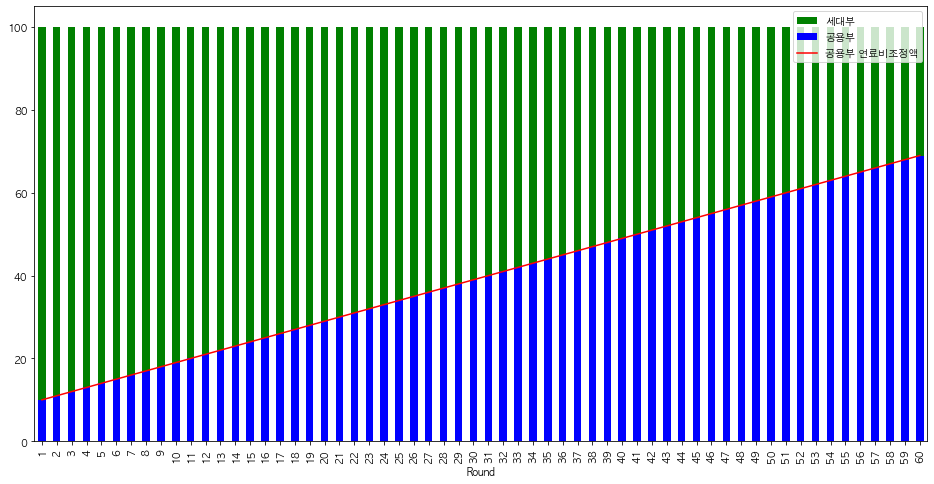

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

# Stacked Bar Chart

ax = pivot_df[['공용부', '세대부']].plot.bar(stacked=True, figsize=(16,8), color=["b", "g"]).legend(loc='upper right')

plt.plot([_ for _ in range(0, 60)],pivot_df['공용부 연료비조정액'], color='r', label='공용부 연료비조정액')
plt.legend(reversed(plt.legend().legendHandles), reversed(['공용부 연료비조정액', '공용부', '세대부']), 
          loc='upper right')

plt.show()

### 수거해 간다라는 의미

In [10]:
crs.utils.print_apt_info(_month, month_df, APT)
pd.DataFrame(anal['전력량요금'])

APT : 44,434kWh (평균 사용량: 411kWh)
		6,439,540원
세대부 : 31,104kWh (70%) (평균 사용량: 288kWh)
		3,798,980원
공용부 : 13,330kWh (30%) (평균 사용량: 123kWh)
		2,640,560원


,전력량요금
APT,4907088
세대부,3118820
공용부,1788268
세대부 / APT percentage,64
공용부 / APT percentage,36


In [37]:
collect_pd = pd.DataFrame(((month_df['usage (kWh)'] / 411) * 100).round().astype("int"))
collect_pd.index = month_df['name']
collect_pd.columns = ['수거율 (%)']

display(Markdown("**세대부 평균 수거율은 {}% 입니다.**".format(
    round(collect_pd['수거율 (%)'].mean())
)))
collect_pd.head()

**세대부 평균 수거율은 70% 입니다.**

,수거율 (%)
name,
아파트1-101-1002,62
아파트1-101-104,168
아파트1-101-1102,45
아파트1-101-1202,58
아파트1-101-1302,111


In [12]:
crs.utils.print_apt_info(_month, month_df, APT)
display(Markdown("**(+) 세대부 평균 수거율 : {}%**".format(
    format(
        round((month_df['usage (kWh)'] / 411).mean() * 100),
        ","
    )
)))

APT : 44,434kWh (평균 사용량: 411kWh)
		6,439,540원
세대부 : 31,104kWh (70%) (평균 사용량: 288kWh)
		3,798,980원
공용부 : 13,330kWh (30%) (평균 사용량: 123kWh)
		2,640,560원


**(+) 세대부 평균 수거율 : 70%**

0      263
1      699
2      193
3      249
4      465
      ... 
103    190
104    300
105    194
106    186
107    158
Name: usage (kWh), Length: 108, dtype: int64

In [ ]:
month_df['usage (kWh)'] + i

In [55]:
# 그림 그릴 공간을 확보한다.
fig = plt.figure(figsize=(16,8))

# celluloid에서 Camera 인스턴스를 생성하는데, 이는 생성할 때 matplotlib의 figure를 인자로 받는다. 위에서 만든 fig를 넣어준다.
camera = Camera(fig)

for i in range(0, 100):
    _month_sr = month_df['usage (kWh)'] + i
    households_kWh = _month_sr.sum()
    
    APT = round(households_kWh / len(month_df)) + 123

    plt.bar(month_df.index, _month_sr, color='g',label="가구 별 수거 사용량")
    plt.axhline(APT, label="가구 별 수거해야 하는 사용량", color='r')

    plt.axhline(400, label="누진 2단계", color='b')
    plt.axhline(200, label="누진 1단계", color='orange')

    plt.yticks([200, 400])
#     plt.legend(loc='upper right')
    
    # 이를 카메라로 찍는다.
    camera.snap()

# for loop이 종료되고나서 camera 인스턴스의 animate함수를 이용해서 이어붙인다음
animation = camera.animate(interval=50, blit=True)

# .mp4 파일로 저장하면 끝!
animation.save(
    'swo geo.mp4',
    dpi=100,
    savefig_kwargs={
        'frameon': False,
        'pad_inches': 'tight'
    }
)

/var/folders/52/4yvp7r991px0gmq4wyr894j40000gn/T/ipykernel_91789/2547092088.py:29: MatplotlibDeprecationWarning: save() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  animation.save(


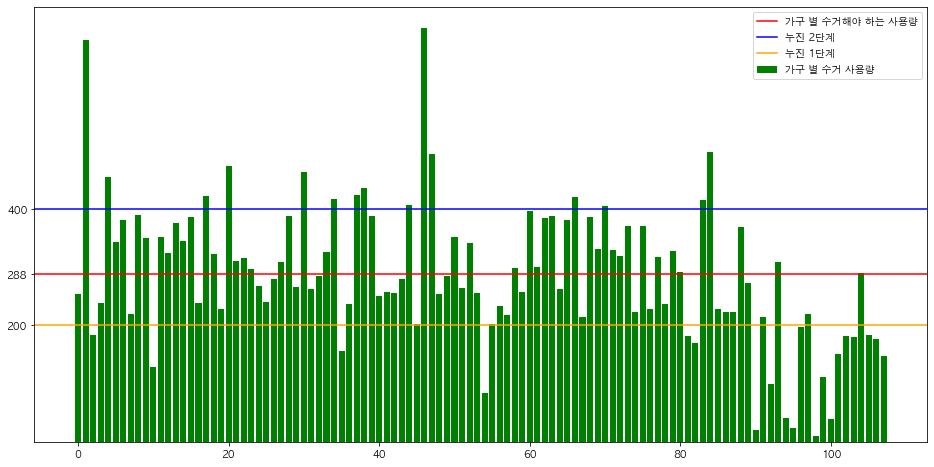

In [68]:
plt.figure(figsize=(16,8))

plt.bar(month_df.index, month_df['usage (kWh)'], color='g',label="가구 별 수거 사용량")
plt.axhline(288, label="가구 별 수거해야 하는 사용량", color='r')

plt.axhline(400, label="누진 2단계", color='b')
plt.axhline(200, label="누진 1단계", color='orange')

plt.yticks([200, 400, 288])
plt.legend()

plt.show()

In [95]:
nugin_1 = [len(month_df[month_df['usage (kWh)'] >= 200]),
           len(month_df[month_df['usage (kWh)'] < 200])]

collect_rate = pd.DataFrame(nugin_1).T
collect_rate.columns = ['전체 수거 완료 가구 수', '수거 미 완료 가구 수']
collect_rate['수거되지 못한 사용량'] = (collect_rate['수거 미 완료 가구 수'] * 200) - (month_df[month_df['usage (kWh)'] < 200]['usage (kWh)'].sum())
collect_rate.index = ['누진 1단계']

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539


In [96]:
_month_df = month_df.copy()
_month_df['usage (kWh)'] = month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0)

nugin_2 = pd.Series([len(month_df[month_df['usage (kWh)'] >= 288]),
           len(month_df[month_df['usage (kWh)'] < 288])], index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수'],
                   name="누진 2단계")
nugin_2['수거되지 못한 사용량'] = (nugin_2['수거 미 완료 가구 수'] * 88) - (_month_df[_month_df['usage (kWh)'] < 88]['usage (kWh)'].sum())
collect_rate = collect_rate.append(
        nugin_2)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,52,56,3358


In [97]:
nugin_3 = pd.Series(["x", "x", "x"], name="누진 3단계", index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수','수거되지 못한 사용량'])
collect_rate = collect_rate.append(
        nugin_3)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,52,56,3358
누진 3단계,x,x,x


In [105]:
_month_df[_month_df['usage (kWh)'] >= 88]['usage (kWh)'].map(lambda x: 200 if x > 200 else x - 88).sum()

5090

In [109]:
_month_df[_month_df['usage (kWh)'] >= 200]['usage (kWh)'].map(lambda x: x - 200).sum()

1127

In [116]:
_collect_values = ["x", _month_df[_month_df['usage (kWh)'] >= 88]['usage (kWh)'].map(lambda x: 200 - 88 if x >= 200 else x - 88).sum(),
                  _month_df[_month_df['usage (kWh)'] >= 200]['usage (kWh)'].map(lambda x: x - 200).sum()]
collect_rate['더 수거된 사용량'] = _collect_values
collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량,더 수거된 사용량
누진 1단계,88,20,1539,x
누진 2단계,52,56,3358,3770
누진 3단계,x,x,x,1127


In [124]:
round((73.3 * 1539) + (142.3 * 3358)) - round((142.3 * 3770) + (210.6 * 1127))

-183165

In [123]:
round((142.3 * 3770) + (210.6 * 1127))

773817.2

In [61]:
surplus = pd.DataFrame(month_df['usage (kWh)'])
surplus.index = month_df['name']

# 1단계 잉여자원
surplus['1단계'] = (surplus['usage (kWh)'] - 200).map(lambda x:
                                                0 if x >= 0 else x * -1)

In [62]:
nugin_1 = [len(month_df[month_df['usage (kWh)'] >= 200]),
           len(month_df[month_df['usage (kWh)'] < 200])]

collect_rate = pd.DataFrame(nugin_1).T
collect_rate.columns = ['전체 수거 완료 가구 수', '수거 미 완료 가구 수']
collect_rate['수거되지 못한 사용량'] = (collect_rate['수거 미 완료 가구 수'] * 200) - (month_df[month_df['usage (kWh)'] < 200]['usage (kWh)'].sum())
collect_rate.index = ['누진 1단계']

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539


In [60]:
_month_df = month_df.copy()
_month_df['usage (kWh)'] = month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0)

nugin_2 = pd.Series([len(month_df[month_df['usage (kWh)'] >= 400]),
           len(month_df[month_df['usage (kWh)'] < 400])], index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수'],
                   name="누진 2단계")
nugin_2['수거되지 못한 사용량'] = (nugin_2['수거 미 완료 가구 수'] * 200) - (_month_df[_month_df['usage (kWh)'] < 200]['usage (kWh)'].sum())
collect_rate = collect_rate.append(
        nugin_2)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,15,93,11684


In [142]:
_month_df['usage (kWh)'] = _month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0)
nugin_3 = pd.Series([len(month_df[month_df['usage (kWh)'] >= 411]),
           len(month_df[month_df['usage (kWh)'] < 411])], index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수'],
                   name="누진 3단계")
nugin_3['수거되지 못한 사용량'] = (nugin_3['수거 미 완료 가구 수'] * 11) - (_month_df[_month_df['usage (kWh)'] < 11]['usage (kWh)'].sum())
collect_rate = collect_rate.append(
        nugin_3)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,15,93,11684
누진 3단계,13,95,1034


[88, 20]

In [154]:
last_nugin = pd.Series([
    collect_rate.loc['누진 1단계']['수거되지 못한 사용량'],
    collect_rate.loc['누진 2단계']['수거되지 못한 사용량'],
    collect_rate['수거되지 못한 사용량']['누진 3단계'] - (month_df[month_df['usage (kWh)'] > 411]['usage (kWh)'] - 411).sum()
])

collect_rate['최종 잉여 사용량'] = last_nugin.values.astype("int")
collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량,최종 잉여 사용량
누진 1단계,88,20,1539,1539
누진 2단계,15,93,11684,11684
누진 3단계,13,95,1034,61


973

In [125]:
_month_df['usage (kWh)'] = month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0).map(
    lambda x: 11 - x if x > 11 else x
)
                                                      x - 200 if x > 200 else 0
                                                      )

In [138]:
_month_df

,name,usage (kWh)
0,아파트1-101-1002,0
1,아파트1-101-104,289
2,아파트1-101-1102,0
3,아파트1-101-1202,0
4,아파트1-101-1302,55
...,...,...
103,아파트1-104-606,0
104,아파트1-104-705,0
105,아파트1-104-708,0
106,아파트1-104-902,0


In [134]:
month_df

,name,usage (kWh)
0,아파트1-101-1002,253
1,아파트1-101-104,689
2,아파트1-101-1102,183
3,아파트1-101-1202,239
4,아파트1-101-1302,455
...,...,...
103,아파트1-104-606,180
104,아파트1-104-705,290
105,아파트1-104-708,184
106,아파트1-104-902,176
